In [106]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time , math

In [108]:
df=pd.read_csv('/content/drive/MyDrive/WOC_6.0/K_means_Clustering/Kmean_dataset.csv')
df

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [109]:
x_train=np.array(df.iloc[:])
x_train.shape

(178, 13)

In [291]:
class Kmeans:
  def __init__(self, max_K):
    self.max_K = max_K

  def random_centers(self,K):
    self.centeroids = np.random.permutation(self.X)[:K]
    '''
    self.centeroids = np.zeros((K,self.X.shape[1]))
    for i in range(K):
      self.centeroids[i] = np.random.uniform(low=np.min(self.X, axis=0), high=np.max(self.X, axis=0)+1e-15, size=self.X.shape[1])
    '''
  def closest_centeroid(self):
    a,b = self.X.shape
    c = self.centeroids.shape[0]
    X = self.X.reshape(a,1,b)
    X = X.repeat(c, axis=1)
    distance = np.sum((X - self.centeroids)**2 , axis=2)
    centers = np.argmin(distance, axis =1)
    return centers , distance

  def update_centeroids(self , K, cluster):
    new_centeroids = np.zeros((K,self.X.shape[1]))
    for i in range(K):
      #had to do this to avoid runtime error due to taking mean of a empty array
      indexes = np.where(cluster == i)[0]
      if indexes.shape[0]!= 0:
        new_centeroids[i] = np.mean(self.X[indexes] , axis = 0)
      else:
        new_centeroids[i] = cluster[i]
    return new_centeroids

  def fit(self , X, max_iter = 300 , max_times = 50):
    self.X = X
    cluster_history =[]
    centeroid_history=[]
    cost_history = []
    for K in range(1,self.max_K):
      for i in range(max_times):
        self.random_centers(K)
        cluster_old = np.zeros(self.X.shape[0])
        cost_old = 0
        for j in range(max_iter):
          cluster, distance = self.closest_centeroid()
          temp = np.where((cluster.reshape(-1,1)==np.arange(0,K)),1,0)
          cost = np.sum(distance*temp)
          new_centeroids = self.update_centeroids(K, cluster)
          if np.all(new_centeroids == self.centeroids):
            break
          if cost <= cost_old:
            self.centeroids = new_centeroids
            cost_old = cost
      cost_history.append(cost)
      cluster_history.append(cluster)
      centeroid_history.append(self.centeroids)
      self.plot_clusters(K, cluster)
    self.plot_cost(cost_history)
    return cluster_history , centeroid_history

  def plot_cost(self, cost):
    plt.plot( np.arange(len(cost), dtype = int)+1 , cost)
    plt.title('Cost vs K')
    plt.xlabel('K')
    plt.ylabel('Cost')
    plt.show()

  def plot_clusters(self, K, cluster):
    plt.scatter(self.X[:, 1], self.X[:, -1], c=cluster, cmap='viridis', alpha=0.7)
    plt.scatter(self.centeroids[:, 1], self.centeroids[:,-1], c='red', label = "Centeroids")
    plt.title(f'K-Means Clustering (K={K})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

In [292]:
model = Kmeans(8)

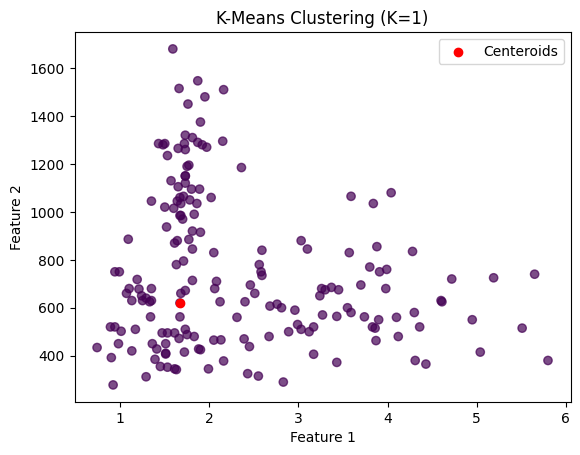

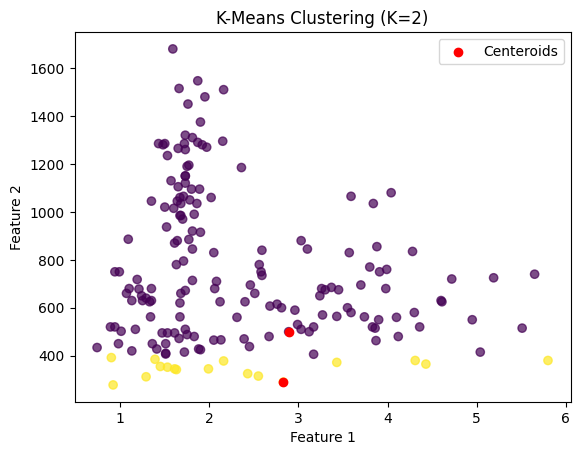

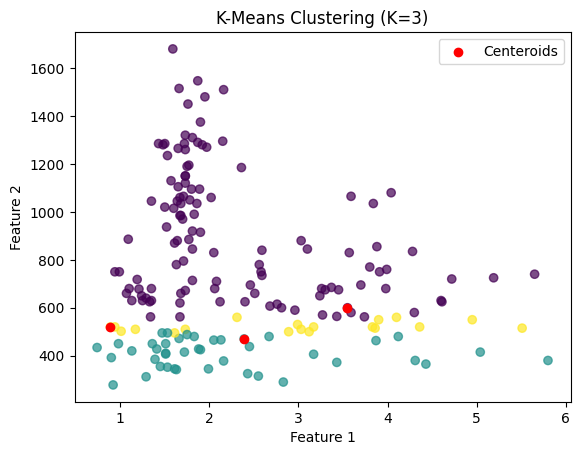

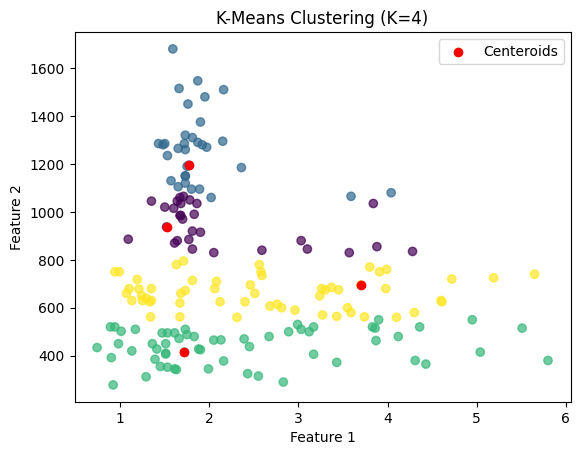

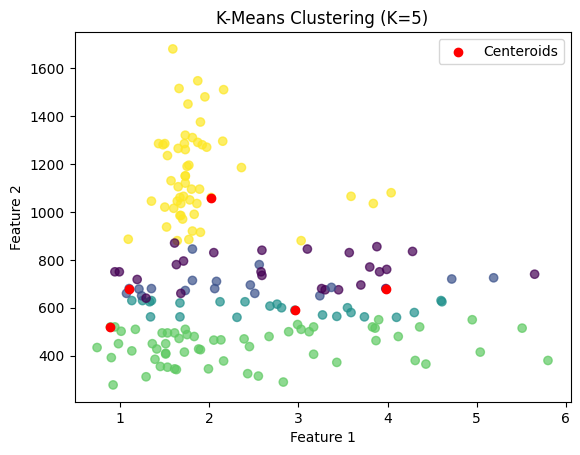

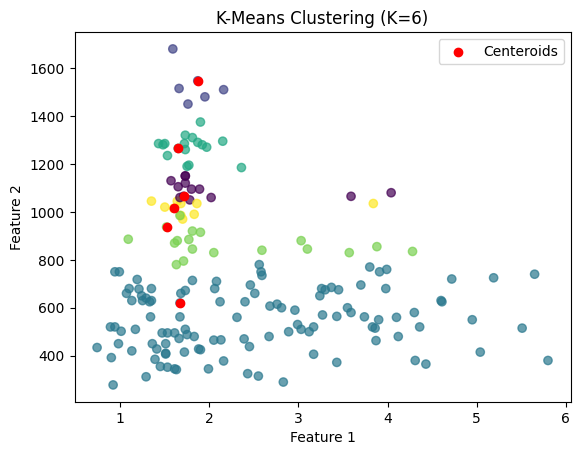

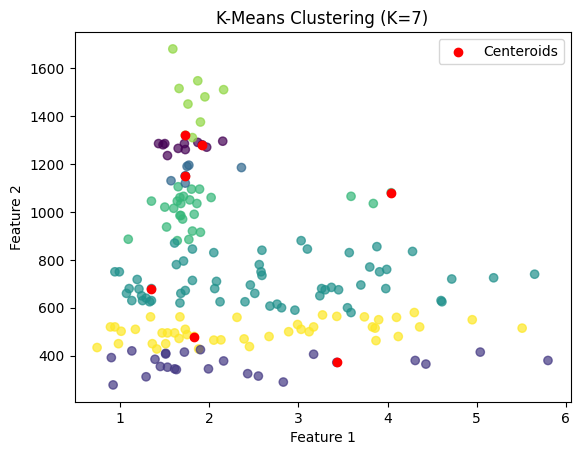

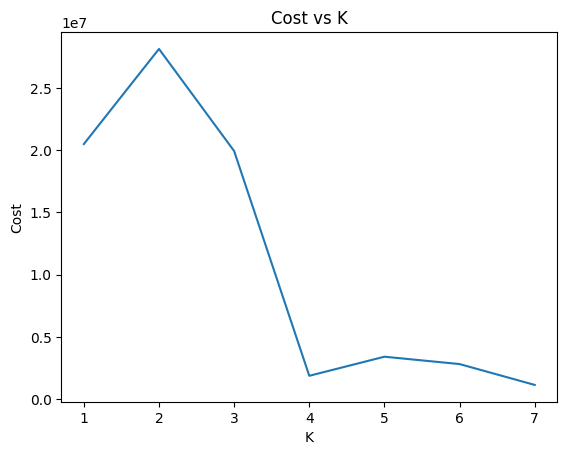

In [293]:
cluster_history , centeroid_history = model.fit(x_train , max_iter = 300 , max_times = 200)

In [ ]:
cluster_history[3]